In [1]:
import matplotlib.pyplot as plt
PLOT_DIR = "../experiments/plots/science-style"
FIGURE_DPI = 200

In [8]:
import scienceplots
plt.style.use(['science']) # 'notebook' 'science'
plt.rcParams.update({'font.size': 14})

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def sample_levels(targetDegree, num_samples=100000):
    layer_scale_factor = 1/np.log(targetDegree)
    U = np.random.uniform(0, 1, size=num_samples)
    levels = np.floor(-np.log(U)*layer_scale_factor).astype(int)
    return levels

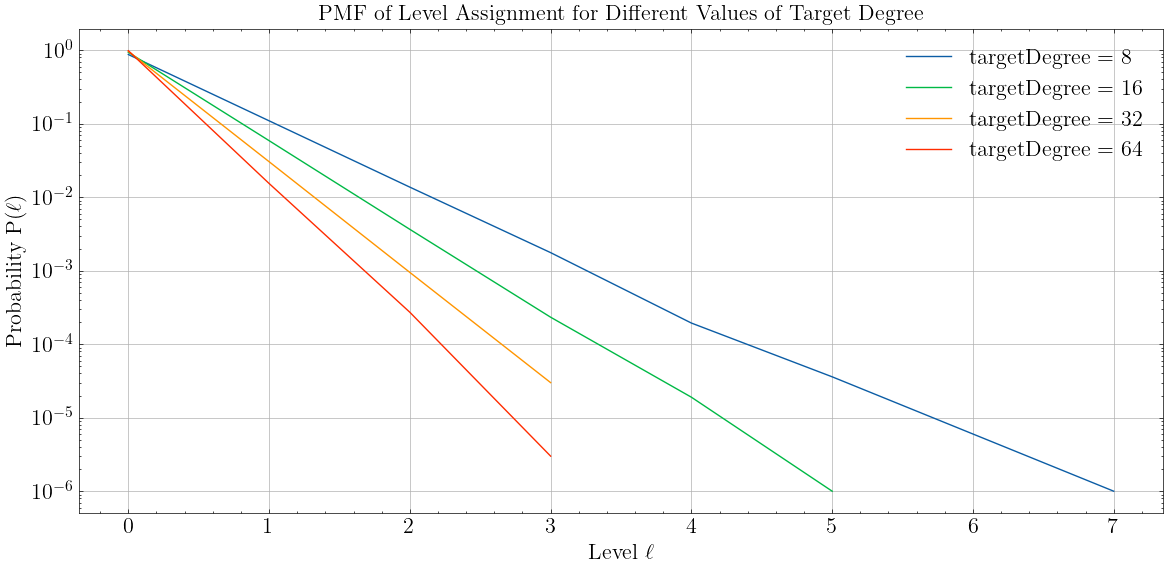

In [10]:
def plot_pmf_for_targetDegree_values(targetDegree_values, num_samples=1000000):
    plt.figure(figsize=(12, 6))
    for targetDegree in targetDegree_values:
        samples = sample_levels(targetDegree, num_samples)
        counts = Counter(samples)

        # normalise for probabilities
        xs = sorted(counts.keys())
        ps = [counts[x] / num_samples for x in xs]

        plt.plot(xs, ps, label=f"targetDegree = {targetDegree}")

    plt.xlabel("Level $\ell$")
    plt.ylabel("Probability P($\ell$)")
    plt.title("PMF of Level Assignment for Different Values of Target Degree")
    plt.legend()

    # set to log scale
    plt.yscale('log')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_pmf_for_targetDegree_values([8, 16, 32, 64])

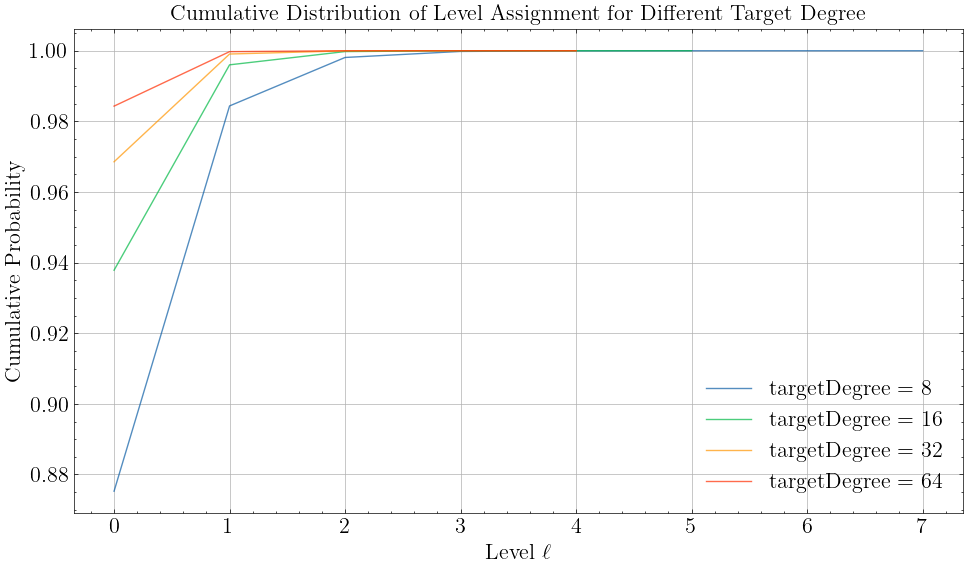

In [14]:
def plot_cdf_for_targetDegree_values(targetDegree_values, num_samples=1000000):
    plt.figure(figsize=(10, 6))

    for targetDegree in targetDegree_values:
        samples = sample_levels(targetDegree, num_samples)
        counts = Counter(samples)

        xs = sorted(counts.keys())
        pmf = np.array([counts[x] / num_samples for x in xs])
        cdf = np.cumsum(pmf)

        plt.plot(xs, cdf, label=f"targetDegree = {targetDegree}", linewidth=1.0, alpha=0.7)

    plt.title("Cumulative Distribution of Level Assignment for Different Target Degree")
    plt.xlabel("Level $\ell$")
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.savefig(f"{PLOT_DIR}/target_degree_parameter_plot.pdf", dpi=FIGURE_DPI, bbox_inches='tight')
    plt.show()

plot_cdf_for_targetDegree_values([8, 16, 32, 64])